In [1]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv("vestel_train.csv")

In [3]:
train.head()

,ImageName,bleach_with_non_chlorine,do_not_bleach,do_not_dryclean,do_not_tumble_dry,do_not_wash,double_bar,dryclean,low_temperature_tumble_dry,normal_temperature_tumble_dry,single_bar,tumble_dry,wash_30,wash_40,wash_60,wash_hand
0,train_1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
1,train_2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,train_3,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
3,train_4,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
4,train_5,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1


In [4]:
train.columns


Index(['ImageName', 'bleach_with_non_chlorine', 'do_not_bleach',
       'do_not_dryclean', 'do_not_tumble_dry', 'do_not_wash', 'double_bar',
       'dryclean', 'low_temperature_tumble_dry',
       'normal_temperature_tumble_dry', 'single_bar', 'tumble_dry', 'wash_30',
       'wash_40', 'wash_60', 'wash_hand'],
      dtype='object')

In [5]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Train/'+train['ImageName'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 936/936 [02:40<00:00,  4.34it/s]


In [6]:
X.shape

(936, 400, 400, 3)

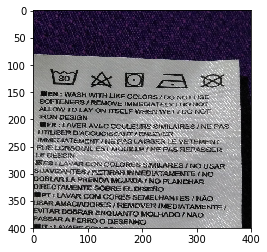

In [8]:
plt.imshow(X[5])

In [9]:
y = np.array(train.drop(['ImageName'],axis=1))
y.shape


(936, 15)

In [10]:
y[5]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [20]:

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='sigmoid'))

    

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)        51264     
__________

In [21]:
y_train.shape[1]

15

In [13]:

model = Sequential()
model.add(Dense(5000, activation='relu', input_shape=(400,400,3)))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation='sigmoid'))


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5000)              2005000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 600)               3000600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                9015      
Total params: 5,014,615
Trainable params: 5,014,615
Non-trainable params: 0
_________________________________________________________________


In [22]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd)

In [24]:
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test), batch_size=32)


Train on 655 samples, validate on 281 samples
Epoch 1/5
655/655 [==============================] - ETA: 5:17 - loss: 0.680 - ETA: 4:58 - loss: 0.666 - ETA: 4:41 - loss: 0.654 - ETA: 4:24 - loss: 0.644 - ETA: 4:09 - loss: 0.636 - ETA: 3:52 - loss: 0.633 - ETA: 3:36 - loss: 0.630 - ETA: 3:20 - loss: 0.624 - ETA: 3:06 - loss: 0.619 - ETA: 2:49 - loss: 0.615 - ETA: 2:33 - loss: 0.613 - ETA: 2:16 - loss: 0.608 - ETA: 2:00 - loss: 0.604 - ETA: 1:44 - loss: 0.600 - ETA: 1:29 - loss: 0.596 - ETA: 1:13 - loss: 0.597 - ETA: 56s - loss: 0.592 - ETA: 40s - loss: 0.58 - ETA: 24s - loss: 0.58 - ETA: 7s - loss: 0.5813 - 394s 601ms/step - loss: 0.5800 - val_loss: 0.5916
Epoch 2/5
655/655 [==============================] - ETA: 5:40 - loss: 0.486 - ETA: 5:06 - loss: 0.511 - ETA: 4:54 - loss: 0.511 - ETA: 4:34 - loss: 0.503 - ETA: 4:20 - loss: 0.491 - ETA: 4:04 - loss: 0.495 - ETA: 3:50 - loss: 0.491 - ETA: 3:35 - loss: 0.494 - ETA: 3:18 - loss: 0.495 - ETA: 3:01 - loss: 0.492 - ETA: 2:43 - loss: 0.488 

In [12]:
classes = np.array(train.columns[1:])
classes

array(['do_not_bleach', 'do_not_dryclean', 'do_not_tumble_dry',
       'do_not_wash', 'double_bar', 'dryclean',
       'low_temperature_tumble_dry', 'normal_temperature_tumble_dry',
       'single_bar', 'tumble_dry', 'wash_30', 'wash_40', 'wash_60',
       'wash_hand'], dtype=object)

In [19]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


In [ ]:
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [20]:
model.save('first_model.h5')

In [ ]:
from keras.models import load_model
previous_model = load_model('first_model.h5')


In [25]:
img = image.load_img('test_resmi.jpg', target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [29]:

#proba = model.predict(img.reshape(1,400,400,3))
#proba

preds = model.predict(X_test)
preds[preds>=0.5] = 1
preds[preds<0.5] = 0

array([[0.0662119 , 0.9180093 , 0.44187203, 0.72996545, 0.10464543,
        0.08130318, 0.49314925, 0.12150992, 0.06786358, 0.26845333,
        0.06484491, 0.60036516, 0.20323446, 0.05085484, 0.08804297]],
      dtype=float32)

In [27]:
proba = model.predict(img.reshape(1,400,400,3))
proba

array([[0.23835862, 0.7446805 , 0.4567866 , 0.627658  , 0.25998047,
        0.23265666, 0.5006721 , 0.27628198, 0.21674135, 0.3657284 ,
        0.24155937, 0.54310036, 0.36421534, 0.20995003, 0.25444204]],
      dtype=float32)

In [28]:
classes = np.array(train.columns[1:])
classes

array(['bleach_with_non_chlorine', 'do_not_bleach', 'do_not_dryclean',
       'do_not_tumble_dry', 'do_not_wash', 'double_bar', 'dryclean',
       'low_temperature_tumble_dry', 'normal_temperature_tumble_dry',
       'single_bar', 'tumble_dry', 'wash_30', 'wash_40', 'wash_60',
       'wash_hand'], dtype=object)

In [28]:
img = image.load_img('simurg_ankara_yemek.jpg', target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

In [35]:
proba = model.predict(img.reshape(1,400,400,3))
proba

#old one

array([[0.065943  , 0.9183143 , 0.44180343, 0.73026913, 0.10430785,
        0.08100346, 0.49313772, 0.12116327, 0.06759197, 0.26812473,
        0.0645858 , 0.6005276 , 0.20288755, 0.05061542, 0.08772653]],
      dtype=float32)

In [29]:
proba = model.predict(img.reshape(1,400,400,3))
proba

array([[0.21210071, 0.7698232 , 0.44828334, 0.6444938 , 0.23240569,
        0.20649809, 0.49727786, 0.25169545, 0.18966134, 0.34955803,
        0.21372977, 0.5467569 , 0.34744084, 0.18478362, 0.22935408]],
      dtype=float32)

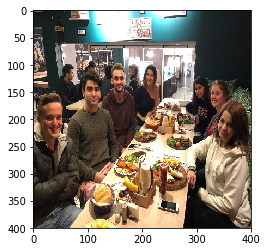

In [38]:
plt.imshow(img)